# Bicol University Workshop: Exploratory Data Analysis (Part 1)
Prepared by: John Raymond B. Barajas

## Confidentiality Notice

This Jupyter Notebook and its contents are confidential and intended solely for the use of the intended recipient(s). If you have received this Notebook in error, please notify the sender immediately and delete it from your system. Any unauthorized use, disclosure, copying, or distribution of this Notebook is strictly prohibited.

The information contained in this Notebook may be privileged and confidential, and is intended only for the named recipient(s). Any review, dissemination, distribution, or copying of this Notebook by anyone other than the intended recipient(s) is strictly prohibited.

The content and opinions expressed in this Notebook are those of the author(s) and may not necessarily reflect the official policies or positions of the organization. Any views or opinions presented in this Notebook are solely those of the author(s) and do not necessarily represent those of the organization.

The security and integrity of the content of this Notebook cannot be guaranteed, and the author(s) shall not be held responsible for any unauthorized modification or alteration of the content.

Please treat this Notebook and its contents with the utmost confidentiality and refrain from sharing or distributing it without explicit permission from the author(s) or the organization.

Thank you for your cooperation and understanding.

## Install Necessary Libraries

In [1]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn
# !pip install ipywidgets
# !pip install scikit-learn
# !pip install scipy
# !pip install "numpy<1.24"

## Import Necessary Libraries

In [2]:
# import the necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Explore the Total Number of Grantees

### Read Both FHE and TES Data

In [3]:
# read FHE data
# change the file path for new data
file_path = 'fhe_clean_data.csv'
df_fhe = pd.read_csv(file_path)

# read TES data
# change the file path for new data
file_path = 'tes_clean_data.csv'
df_tes = pd.read_csv(file_path)

### Create New Column for Total Number of Grantees

In [4]:
# create new column to indicate type of scholarship (for identifier)
df_fhe['SCHOLARSHIP'] = 'FHE'
df_tes['SCHOLARSHIP'] = 'TES'

In [5]:
# check first columns of FHE and TES Data
print('FHE Data Columns')
print(list(df_fhe.columns))
print('TES Data Columns')
print(list(df_tes.columns))

FHE Data Columns
['REGION', 'HEI_NAME', 'HEI_TYPE', 'HEI_CITY', 'HEI_PROVINCE', 'FHE_GRANTEES', 'SEX_M', 'SEX_F', 'NOT_INDICATED', 'YEAR', 'SCHOLARSHIP']
TES Data Columns
['REGION', 'HEI_NAME', 'HEI_TYPE', 'HEI_CITY', 'HEI_PROVINCE', 'TES_GRANTEES', 'SEX_M', 'SEX_F', 'EDUC', 'ARTS', 'SOC_SCI', 'BUSINESS', 'NAT_SCI', 'INFO', 'ENG', 'AGRI', 'HEALTH', 'SERVICES', 'OTHERS', 'YEAR', 'SCHOLARSHIP']


In [6]:
# get total number of grantees
df_fhe['TOTAL_GRANTEES'] = df_fhe['SEX_M'] + df_fhe['SEX_F'] + df_fhe['NOT_INDICATED']
df_tes['TOTAL_GRANTEES'] = df_tes['TES_GRANTEES']

### Make Columns Consistent for FHE and TES Data

In [7]:
# drop cols of TES Data not in FHE Data
df_tes.drop(['TES_GRANTEES', 'EDUC', 'ARTS', 'SOC_SCI',
             'BUSINESS', 'NAT_SCI', 'INFO', 'ENG', 'AGRI', 'HEALTH',
             'SERVICES', 'OTHERS'], inplace=True, axis=1)

In [8]:
# drop cols of FHE Data not in TES Data
df_fhe.drop(['FHE_GRANTEES', 'NOT_INDICATED'], inplace=True, axis=1)

In [9]:
# check columns of FHE and TES Data if consistent
df_fhe.columns == df_tes.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Check Metadata of FHE and TES Data

#### Check Metadata of FHE Data

In [10]:
# check the first 5 rows of FHE Data
df_fhe.head(5)

,REGION,HEI_NAME,HEI_TYPE,HEI_CITY,HEI_PROVINCE,SEX_M,SEX_F,YEAR,SCHOLARSHIP,TOTAL_GRANTEES
0,01 - Ilocos Region,Binalatongan Community College,LUC,SAN CARLOS CITY,PANGASINAN,290.0,431.0,2018-2019,FHE,721.0
1,01 - Ilocos Region,Don Mariano Marcos Memorial State University,SUC,SAN FERNANDO CITY,LA UNION,5280.0,6446.0,2018-2019,FHE,11726.0
2,01 - Ilocos Region,Ilocos Sur Community College,LUC,VIGAN CITY,ILOCOS SUR,412.0,575.0,2018-2019,FHE,987.0
3,01 - Ilocos Region,Ilocos Sur Polytechnic State College,SUC,SANTA MARIA,ILOCOS SUR,2007.0,2385.0,2018-2019,FHE,4392.0
4,01 - Ilocos Region,Mariano Marcos State University,SUC,BATAC CITY,ILOCOS NORTE,3250.0,4573.0,2018-2019,FHE,7823.0


In [11]:
# check info on FHE Data
df_fhe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          936 non-null    object 
 1   HEI_NAME        936 non-null    object 
 2   HEI_TYPE        936 non-null    object 
 3   HEI_CITY        936 non-null    object 
 4   HEI_PROVINCE    936 non-null    object 
 5   SEX_M           936 non-null    float64
 6   SEX_F           936 non-null    float64
 7   YEAR            936 non-null    object 
 8   SCHOLARSHIP     936 non-null    object 
 9   TOTAL_GRANTEES  936 non-null    float64
dtypes: float64(3), object(7)
memory usage: 73.3+ KB


#### Check Metadata of TES Data

In [12]:
# check the first 5 rows of TES Data
df_tes.head(5)

,REGION,HEI_NAME,HEI_TYPE,HEI_CITY,HEI_PROVINCE,SEX_M,SEX_F,YEAR,SCHOLARSHIP,TOTAL_GRANTEES
0,01 - Ilocos Region,ABE International College of Business and Acco...,Private HEI,URDANETA CITY,PANGASINAN,2,5,2018-2019,TES,7
1,01 - Ilocos Region,AMA Computer College-Dagupan City,Private HEI,DAGUPAN CITY,PANGASINAN,6,4,2018-2019,TES,10
2,01 - Ilocos Region,AMA Computer College-La Union,Private HEI,SAN FERNANDO CITY,LA UNION,7,3,2018-2019,TES,10
3,01 - Ilocos Region,AMA Computer College-Laoag City,Private HEI,LAOAG CITY,ILOCOS NORTE,14,29,2018-2019,TES,43
4,01 - Ilocos Region,Asbury College,Private HEI,ANDA,PANGASINAN,48,162,2018-2019,TES,210


In [13]:
# check info on TES Data
df_tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8941 entries, 0 to 8940
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REGION          8941 non-null   object
 1   HEI_NAME        8941 non-null   object
 2   HEI_TYPE        8941 non-null   object
 3   HEI_CITY        8941 non-null   object
 4   HEI_PROVINCE    8941 non-null   object
 5   SEX_M           8941 non-null   int64 
 6   SEX_F           8941 non-null   int64 
 7   YEAR            8941 non-null   object
 8   SCHOLARSHIP     8941 non-null   object
 9   TOTAL_GRANTEES  8941 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 698.6+ KB


### Merge Processed FHE and TES Data

In [14]:
# merge into one dataframe by adding TES records/rows into the FHE data
df_fhe_tes = pd.concat([df_fhe, df_tes], axis=0)

In [15]:
# check the first 5 rows of the merged data
df_fhe_tes.head(5)

,REGION,HEI_NAME,HEI_TYPE,HEI_CITY,HEI_PROVINCE,SEX_M,SEX_F,YEAR,SCHOLARSHIP,TOTAL_GRANTEES
0,01 - Ilocos Region,Binalatongan Community College,LUC,SAN CARLOS CITY,PANGASINAN,290.0,431.0,2018-2019,FHE,721.0
1,01 - Ilocos Region,Don Mariano Marcos Memorial State University,SUC,SAN FERNANDO CITY,LA UNION,5280.0,6446.0,2018-2019,FHE,11726.0
2,01 - Ilocos Region,Ilocos Sur Community College,LUC,VIGAN CITY,ILOCOS SUR,412.0,575.0,2018-2019,FHE,987.0
3,01 - Ilocos Region,Ilocos Sur Polytechnic State College,SUC,SANTA MARIA,ILOCOS SUR,2007.0,2385.0,2018-2019,FHE,4392.0
4,01 - Ilocos Region,Mariano Marcos State University,SUC,BATAC CITY,ILOCOS NORTE,3250.0,4573.0,2018-2019,FHE,7823.0


In [16]:
# check info on merged Data
df_fhe_tes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9877 entries, 0 to 8940
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          9877 non-null   object 
 1   HEI_NAME        9877 non-null   object 
 2   HEI_TYPE        9877 non-null   object 
 3   HEI_CITY        9877 non-null   object 
 4   HEI_PROVINCE    9877 non-null   object 
 5   SEX_M           9877 non-null   float64
 6   SEX_F           9877 non-null   float64
 7   YEAR            9877 non-null   object 
 8   SCHOLARSHIP     9877 non-null   object 
 9   TOTAL_GRANTEES  9877 non-null   float64
dtypes: float64(3), object(7)
memory usage: 848.8+ KB


### Perform Exploratory Data Analysis on Merged FHE and TES Data

#### Inspect Distribution of Numerical Columns

In [17]:
# identify columns which are categorical
cat_fhe_tes = df_fhe_tes.select_dtypes(['object','category']).columns.to_list()

# identify columns which are numerical
num_fhe_tes = df_fhe_tes.select_dtypes(['number']).columns.to_list()

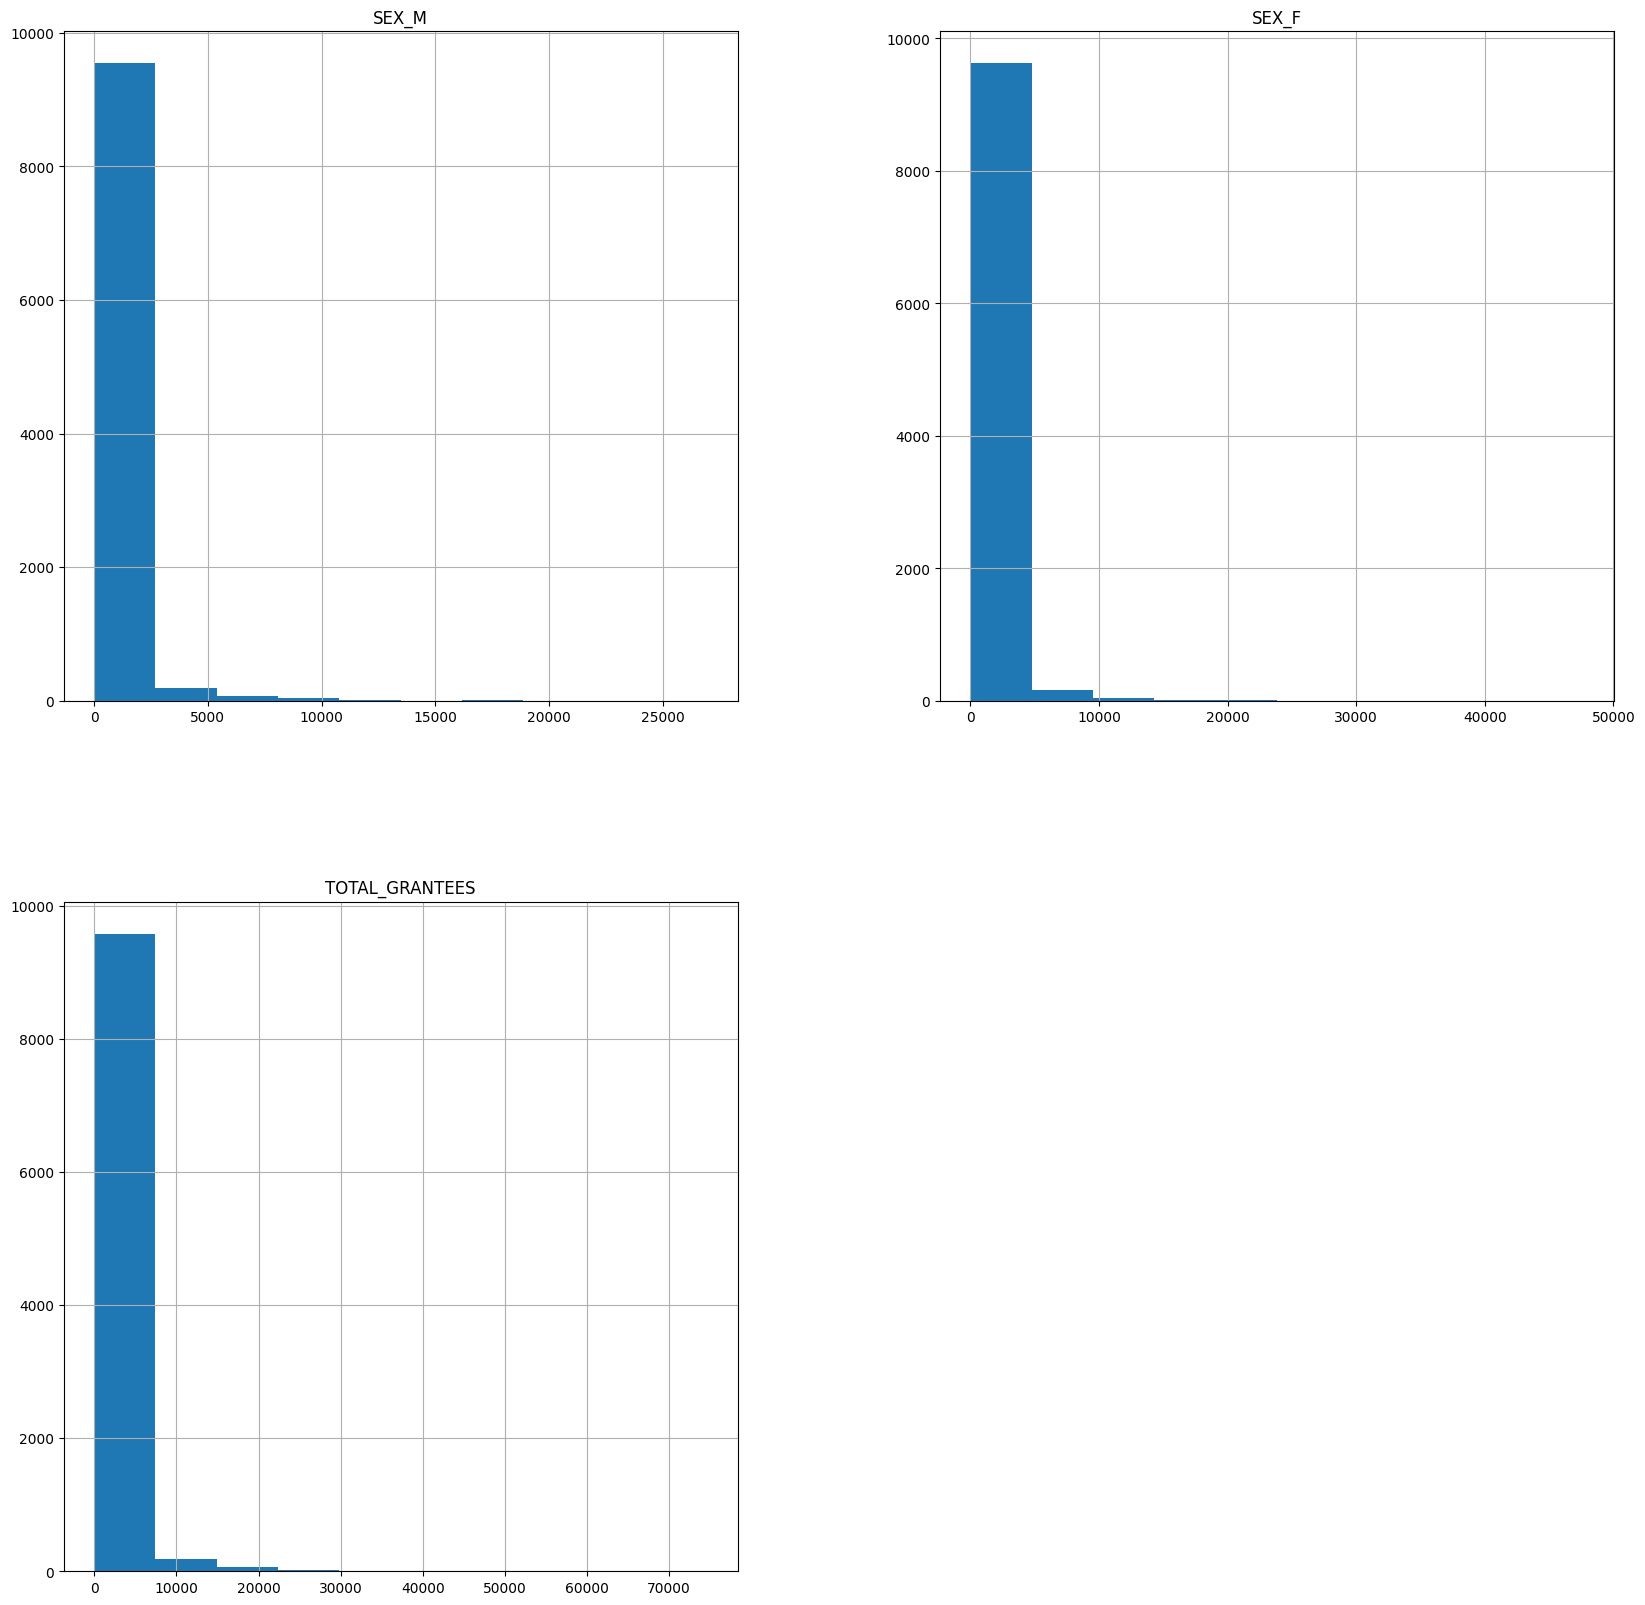

In [18]:
# inspect distribution of Numerical Data
# note that for data of larger size, this will take a while to execute
df_fhe_tes[num_fhe_tes].hist(figsize=(20,20), xrot=0);

#### Inspect Distribution of Categorical Columns

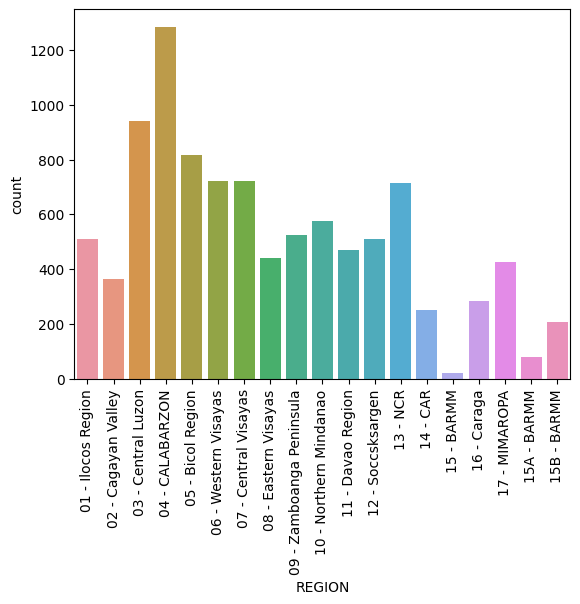

In [19]:
# inspect distribution for all REGION column
ax = sns.countplot(x='REGION', data=df_fhe_tes)
ax.tick_params(axis='x', rotation=90)

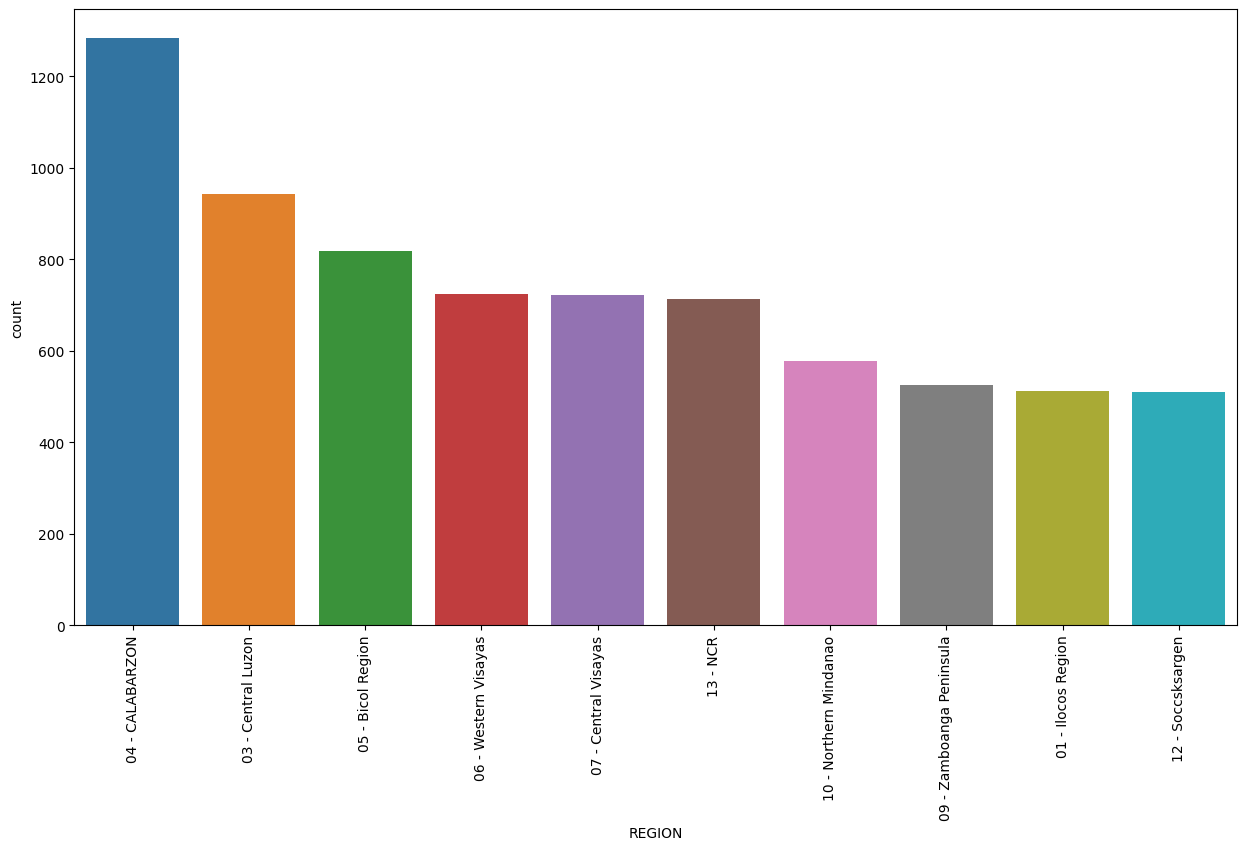

In [20]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='REGION', data=df_fhe_tes, 
                   order=df_fhe_tes['REGION'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

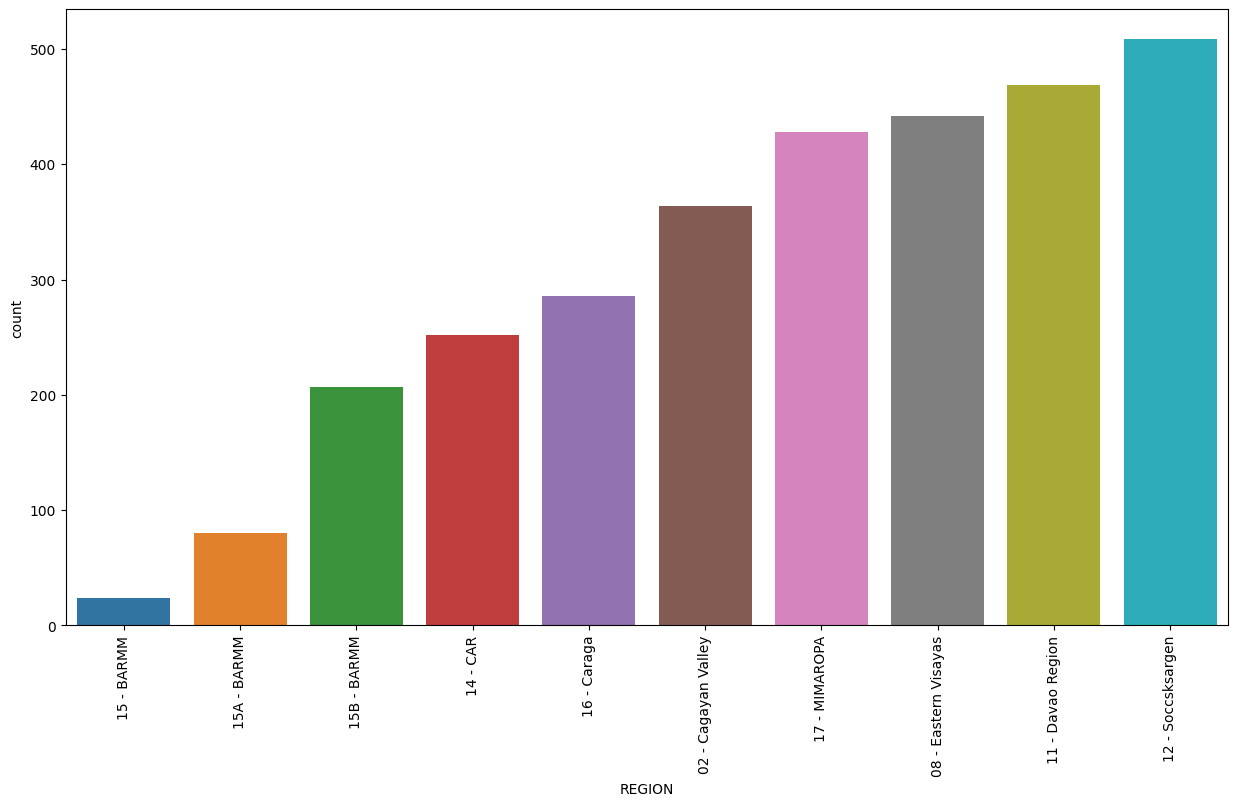

In [32]:
# get least 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='REGION', data=df_fhe_tes, 
                   order=df_fhe_tes['REGION'].value_counts()[::-1].iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

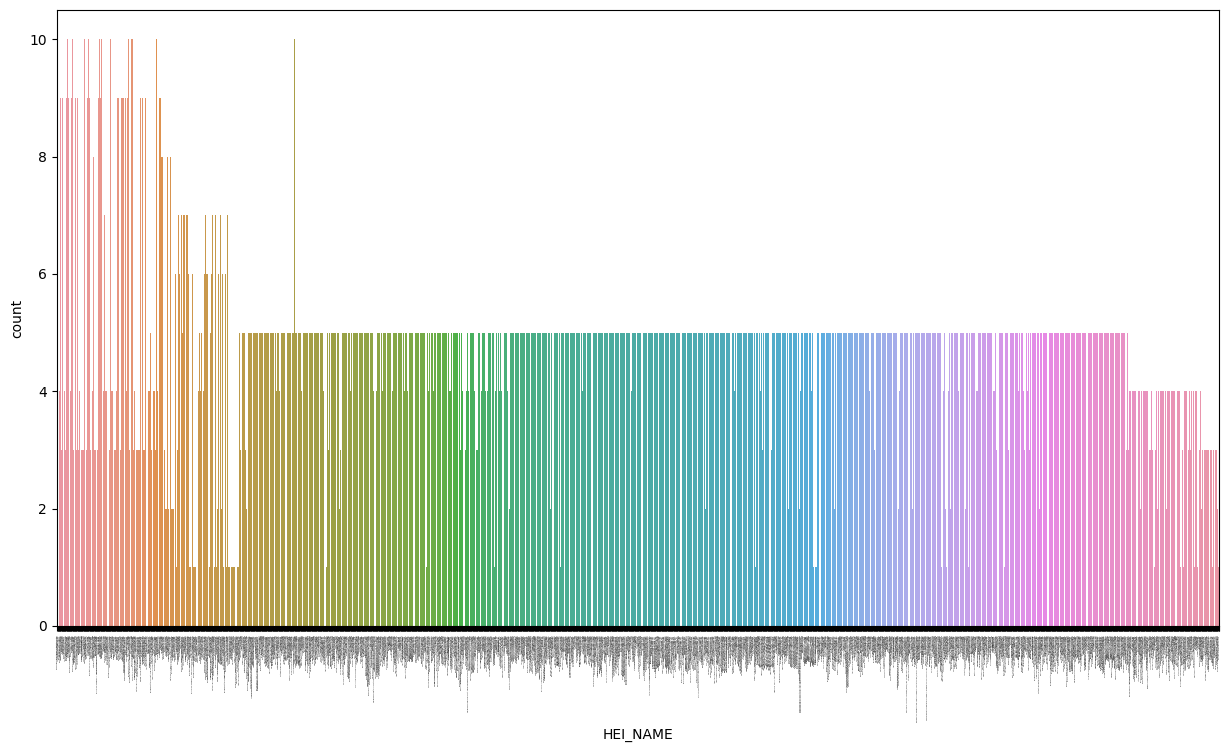

In [21]:
# inspect distribution for all HEI_NAME column
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_NAME', data=df_fhe_tes)
ax.tick_params(axis='x', rotation=90, labelsize=1)

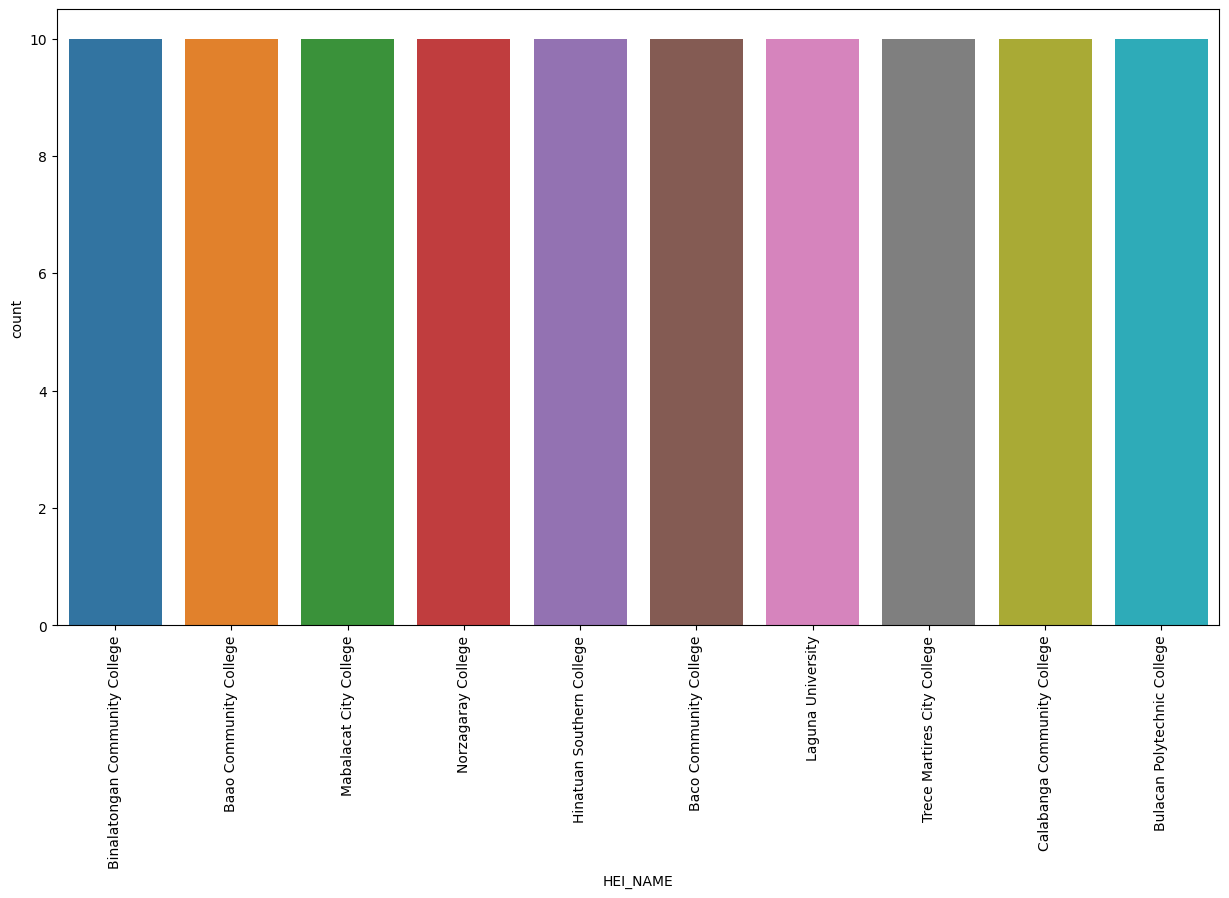

In [22]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_NAME', data=df_fhe_tes, 
                   order=df_fhe_tes['HEI_NAME'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

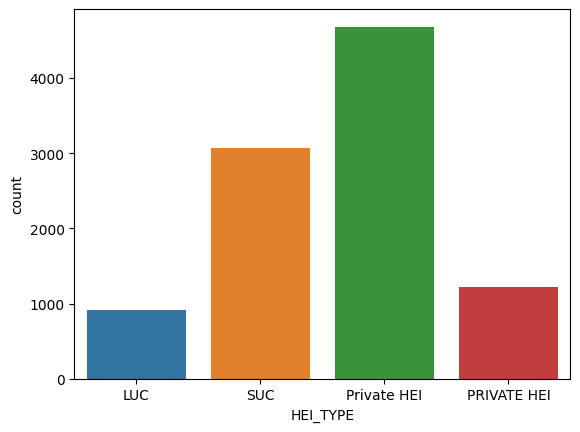

In [54]:
# inspect distribution for all HEI_TYPE column
ax = sns.countplot(x='HEI_TYPE', data=df_fhe_tes)
ax.tick_params(axis='x', rotation=0)

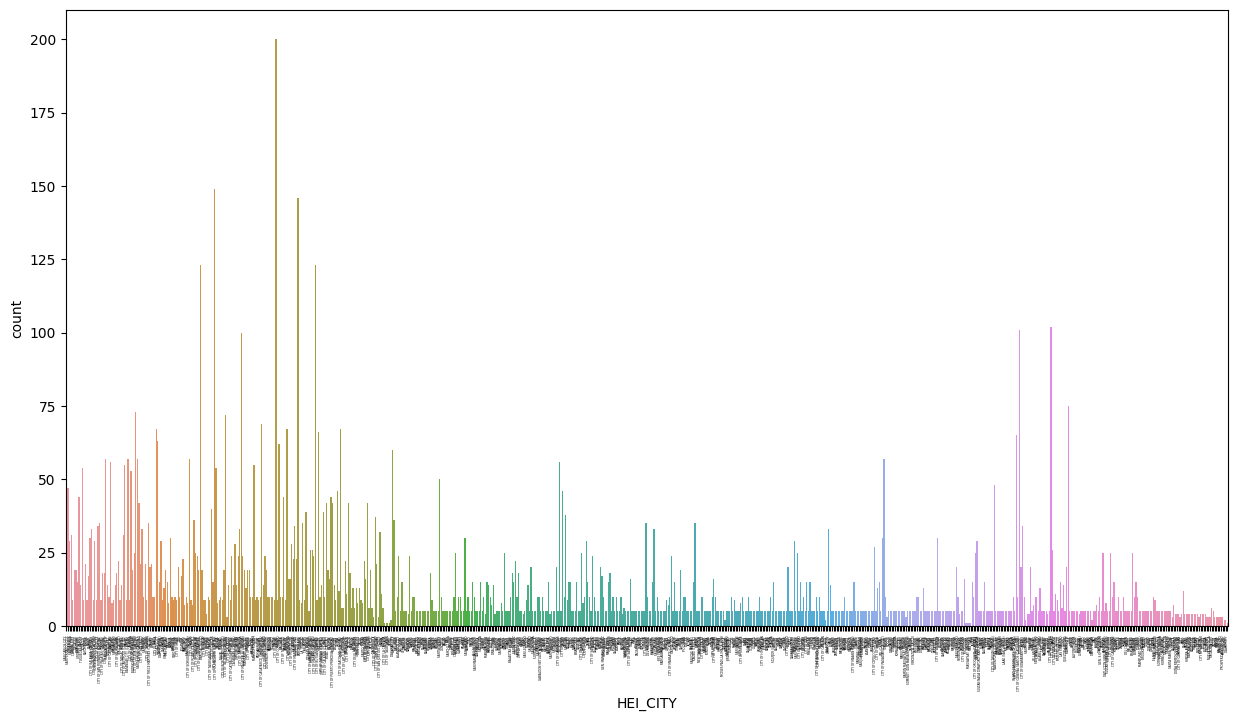

In [60]:
# inspect distribution for all HEI_CITY column
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_CITY', data=df_fhe_tes)
ax.tick_params(axis='x', rotation=90, labelsize=2)

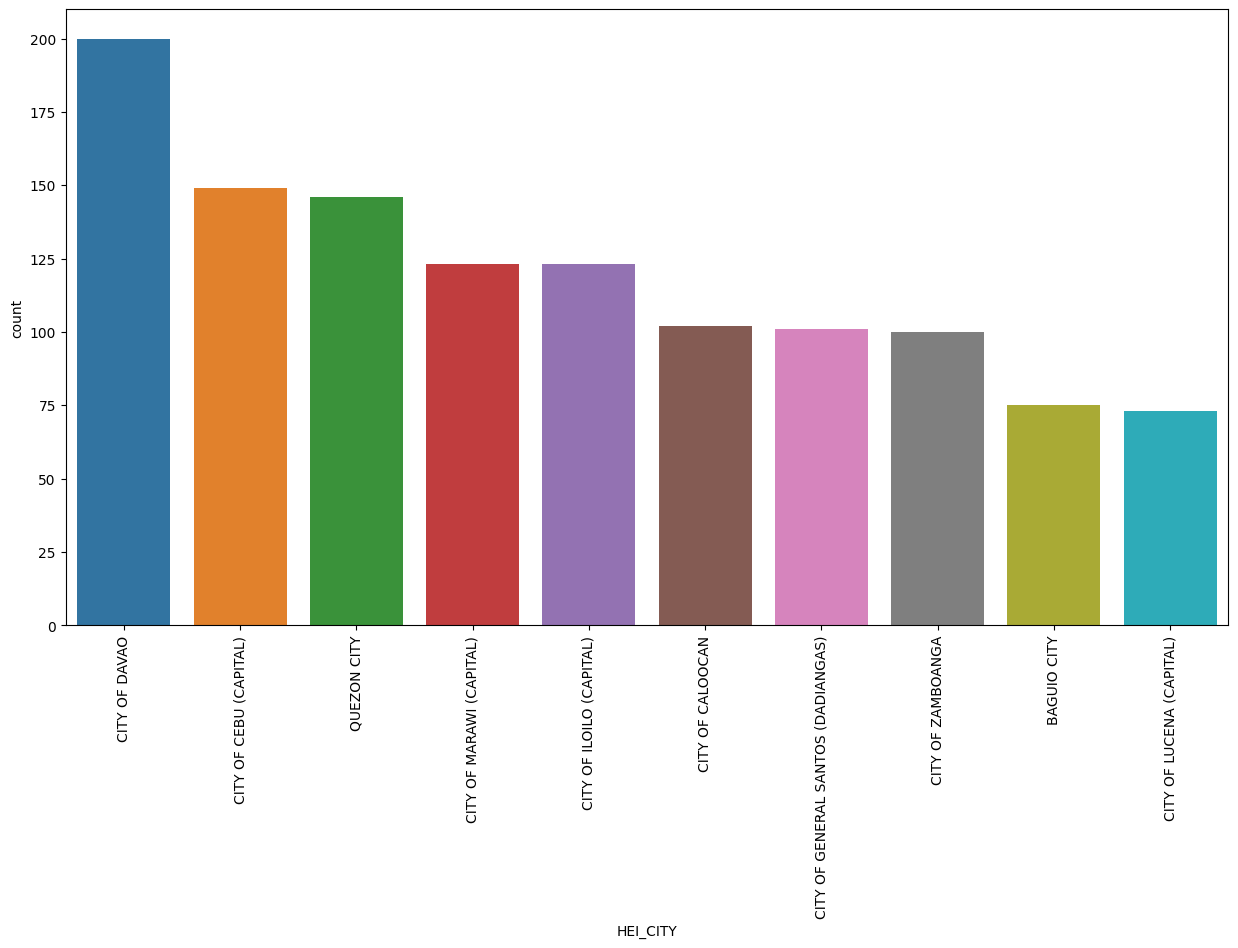

In [24]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_CITY', data=df_fhe_tes, 
                   order=df_fhe_tes['HEI_CITY'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

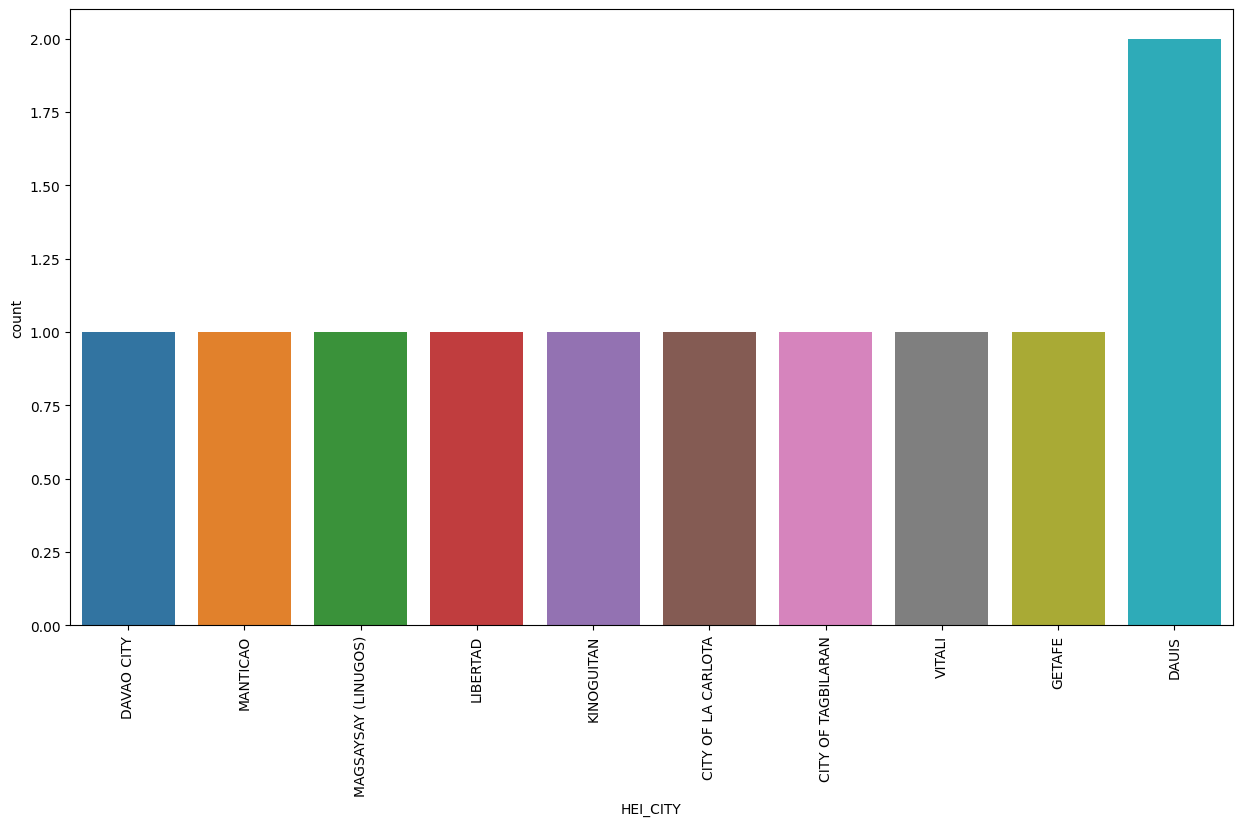

In [31]:
# get least 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_CITY', data=df_fhe_tes, 
                   order=df_fhe_tes['HEI_CITY'].value_counts()[::-1].iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

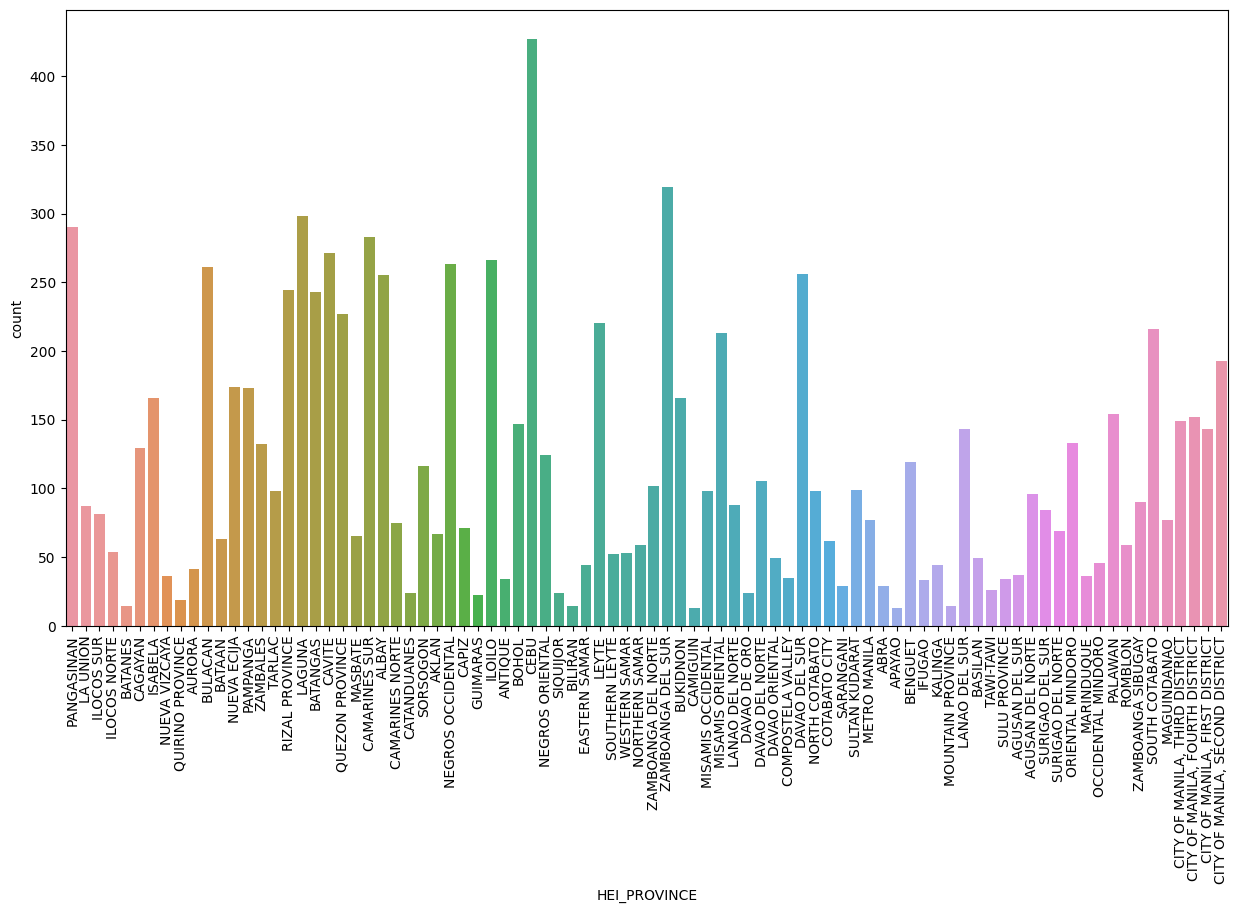

In [64]:
# inspect distribution for all HEI_PROVINCE column
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_PROVINCE', data=df_fhe_tes)
ax.tick_params(axis='x', rotation=90)

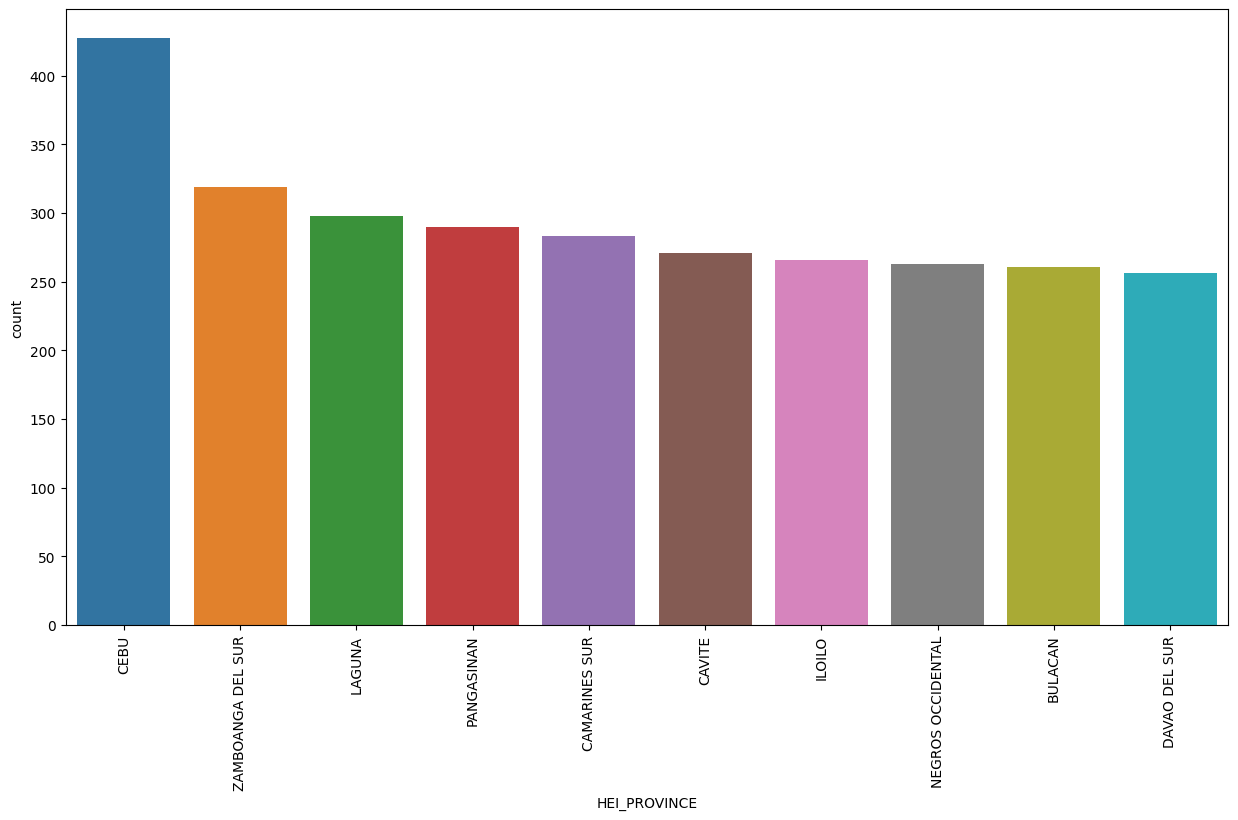

In [25]:
# get top 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_PROVINCE', data=df_fhe_tes, 
                   order=df_fhe_tes['HEI_PROVINCE'].value_counts().iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

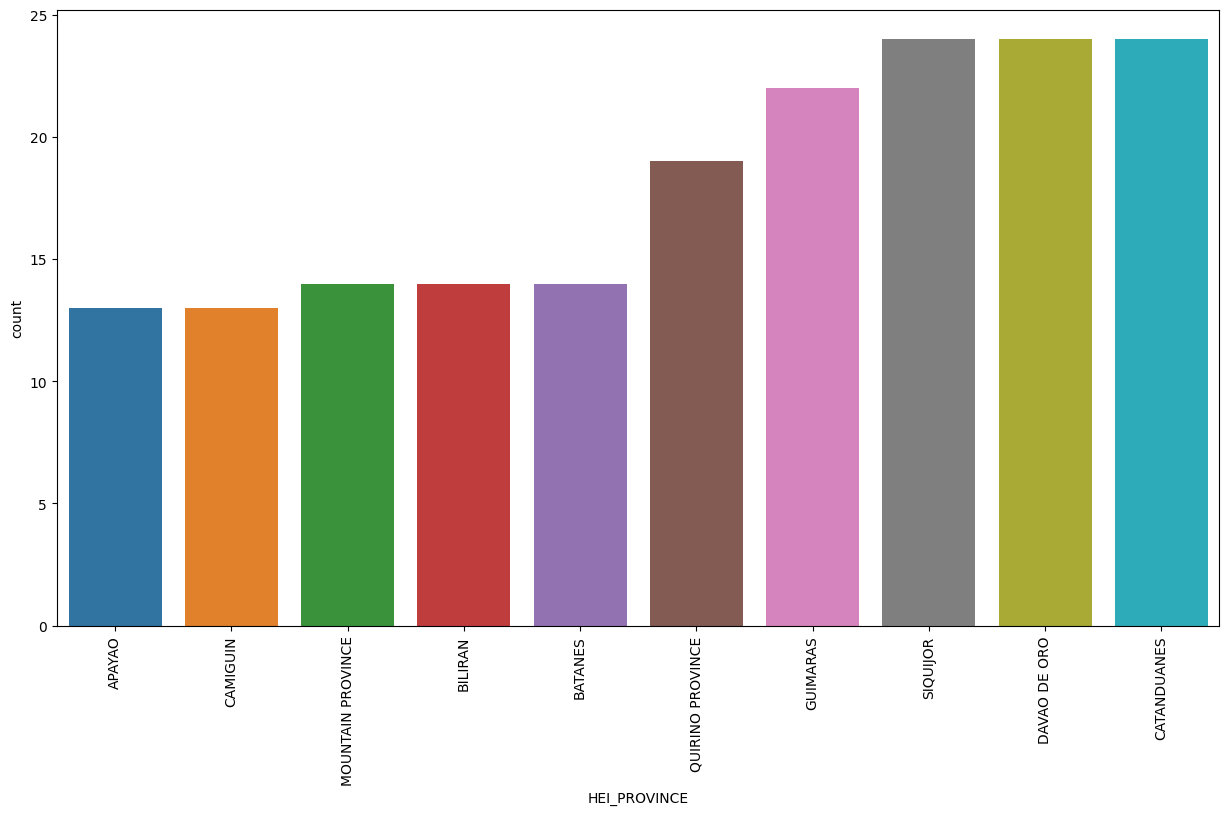

In [28]:
# get least 10
plt.figure(figsize=(15,8))
ax = sns.countplot(x='HEI_PROVINCE', data=df_fhe_tes, 
                   order=df_fhe_tes['HEI_PROVINCE'].value_counts()[::-1].iloc[:10].index)
ax.tick_params(axis='x', rotation=90)

#### Plot Correlation Matrix

The purpose of a correlation matrix in diagnostic analytics is to analyze and understand the relationships between variables in a dataset.

In a nutshell, a correlation matrix provides a numerical measure of the strength and direction of the linear relationship between pairs of variables. It helps to identify whether variables are positively or negatively correlated, and the magnitude of the correlation.

It is important to note that correlation does not imply causation. While a high correlation between two variables suggests a relationship, it does not necessarily imply a cause-and-effect relationship.

Here is some guide on how to interpret a correlation matrix as based on this [reference](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8).

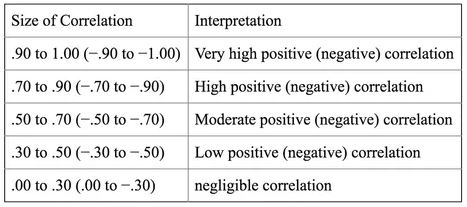

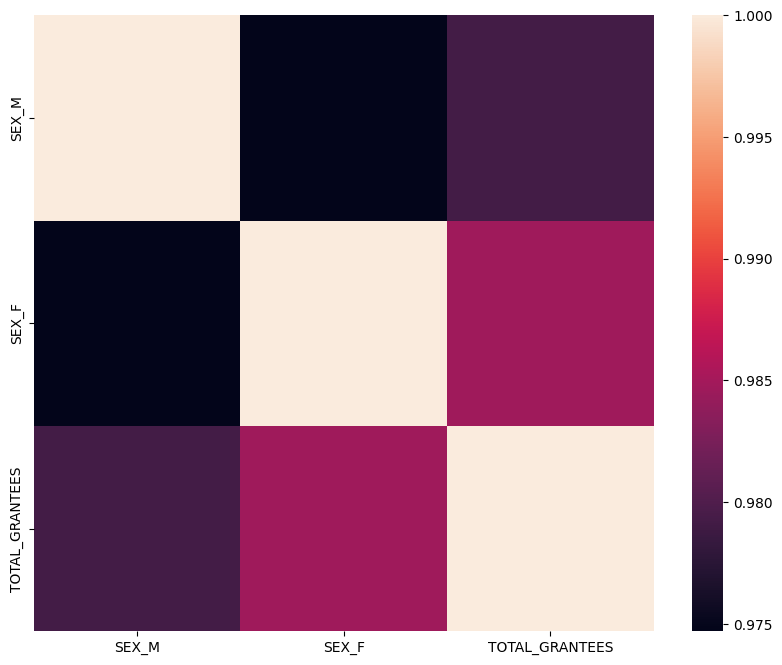

In [65]:
# create new dataframe
df_corr = df_fhe_tes.copy(deep=True)

# get correlation matrix
corr = df_corr.corr(numeric_only=True)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr)

#### Plot Pair Plot

A pair plot is a visual tool used to explore the relationships between multiple variables in a dataset. It is a type of scatter plot matrix that displays pairwise relationships between variables, where each variable is compared with every other variable in the dataset.

The primary use of a pair plot in diagnostic analytics is to identify patterns, correlations, and potential outliers in the data. By visually examining the scatter plots, analysts can quickly assess the strength and direction of relationships between variables. They can detect any linear or nonlinear associations, clusters, or trends within the dataset.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


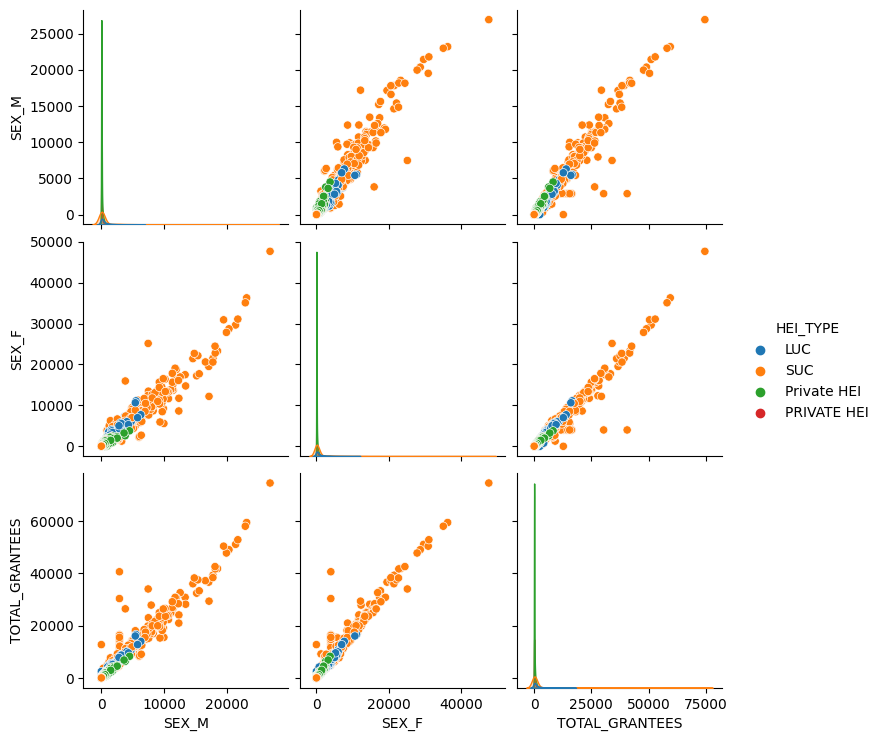

In [68]:
# create pairplot for select features (HEI_TYPE)
sns.pairplot(df_fhe_tes, hue='HEI_TYPE');

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


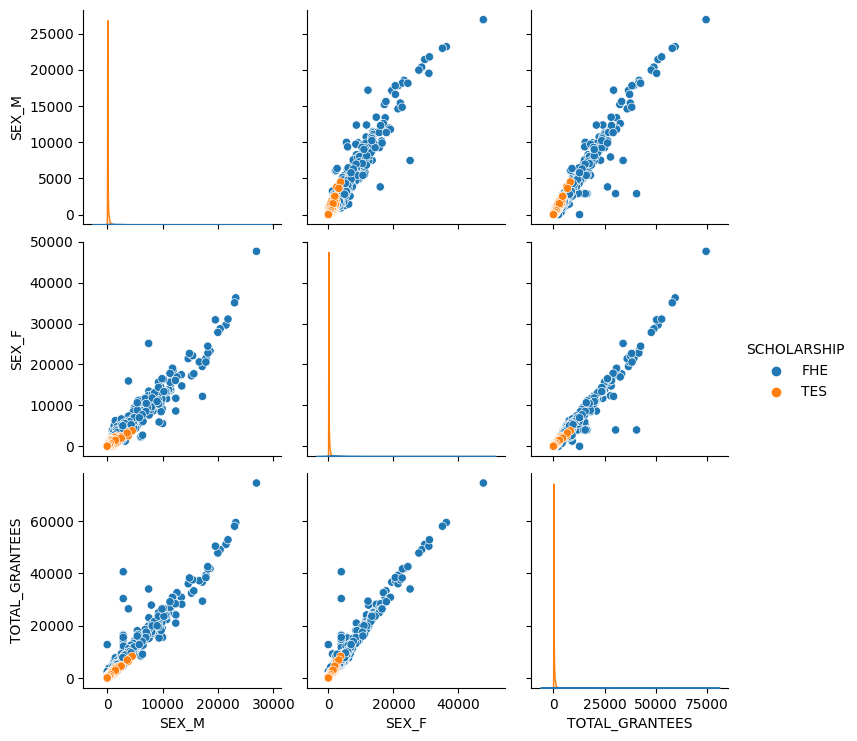

In [69]:
# create pairplot for select features (SCHOLARSHIP)
sns.pairplot(df_fhe_tes, hue='SCHOLARSHIP');

#### Plot Box Plot

As taken from this [website](https://help.ezbiocloud.net/box-plot/), the following image explains how to interpret a boxplot.

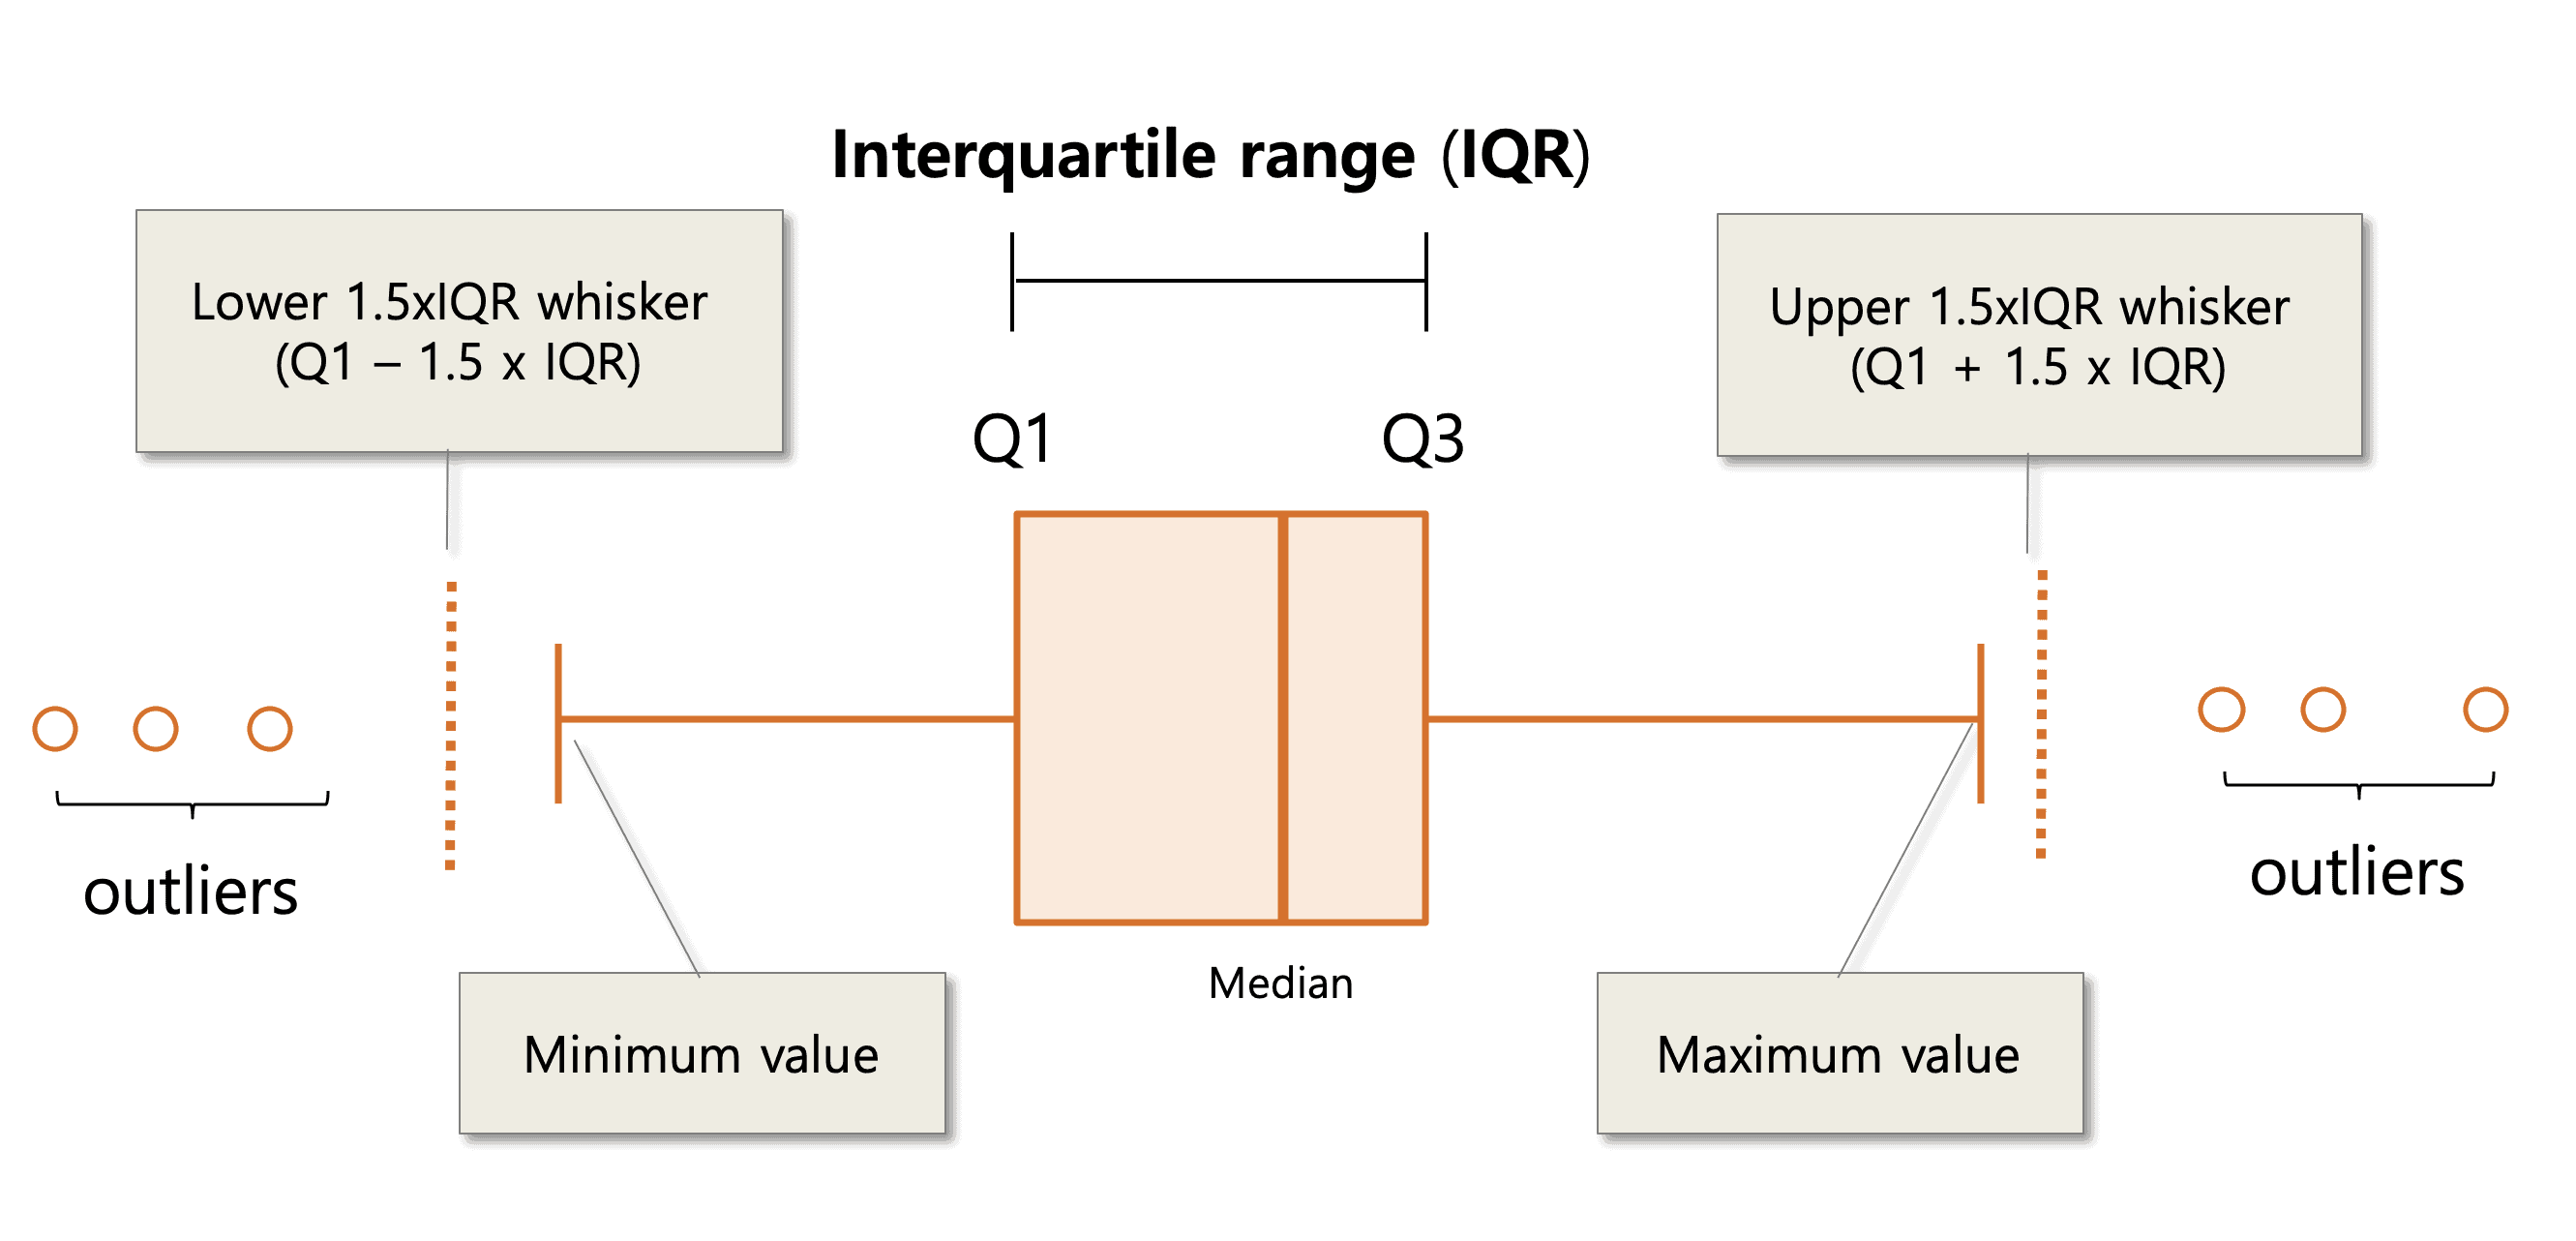

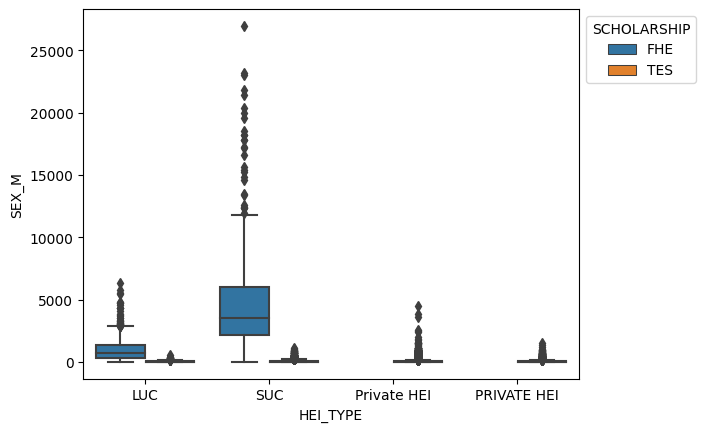

In [76]:
# crete box plot for SEX_M
ax = sns.boxplot(data=df_fhe_tes, x="HEI_TYPE", y="SEX_M", hue='SCHOLARSHIP')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

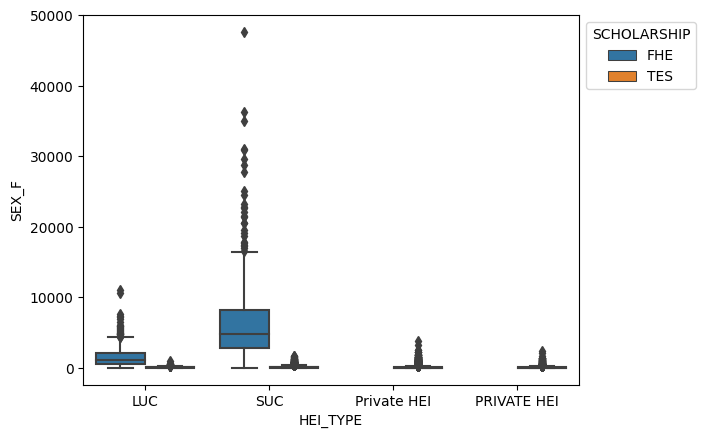

In [79]:
# crete box plot for SEX_F
ax = sns.boxplot(data=df_fhe_tes, x="HEI_TYPE", y="SEX_F", hue='SCHOLARSHIP')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

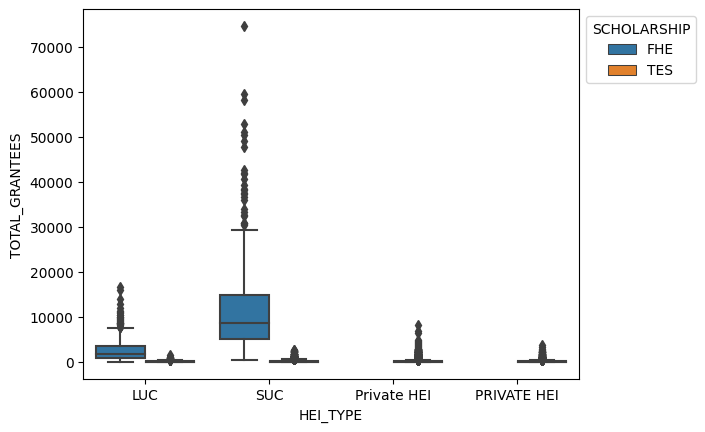

In [80]:
# crete box plot for TOTAL_GRANTEES
ax = sns.boxplot(data=df_fhe_tes, x="HEI_TYPE", y="TOTAL_GRANTEES", hue='SCHOLARSHIP')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Plot Swarm Plot

A swarm plot, also known as a beeswarm plot, is a type of categorical scatter plot that displays the distribution of data points along a categorical variable. It is particularly useful when visualizing the relationship between a categorical variable and a continuous variable.

In a swarm plot, each data point is plotted as a dot, and they are aligned along the categorical axis without overlapping. The dots are spread out horizontally to avoid overlap and provide a clear representation of the data distribution. The vertical position of each dot represents the value of the continuous variable.

The swarm plot allows for the identification of patterns, clusters, and outliers within different categories of the categorical variable. By visualizing the distribution of the continuous variable within each category, analysts can gain insights into the variability and characteristics of the data.

Swarm plots are especially beneficial when the categorical variable has a relatively small number of unique values. They provide a clearer representation of the data distribution compared to traditional scatter plots when dealing with categorical variables.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anacon

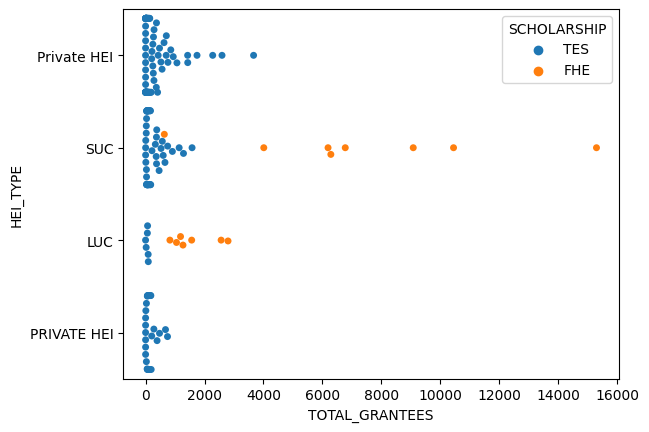

In [92]:
# Draw a categorical scatterplot to show each observation
# Note that the data has been sampled for faster runtime; this code takes a while to execute
ax = sns.swarmplot(data=df_fhe_tes.sample(200, random_state=1334), x="TOTAL_GRANTEES", y="HEI_TYPE", hue="SCHOLARSHIP", s=5)

#### Relational Plots

`sns.relplot` is a versatile plotting function provided by the Seaborn library in Python. It allows for the creation of various relational plots, such as scatter plots and line plots, to explore the relationship between multiple variables in a dataset.

With `sns.relplot`, you can visualize the relationship between two continuous variables using a scatter plot, where each data point is represented as a point on the plot. Additionally, you can incorporate additional dimensions of the data by using different parameters, such as color, size, or shape of the markers, to represent categorical variables or continuous variables.

The `sns.relplot` function provides flexibility in terms of plot types, allowing you to choose between different plot styles, including scatter plots, line plots, and combination plots. It also offers options to facet the plot by additional categorical variables, creating a grid of plots that allows for easy comparison across different subsets of the data.

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


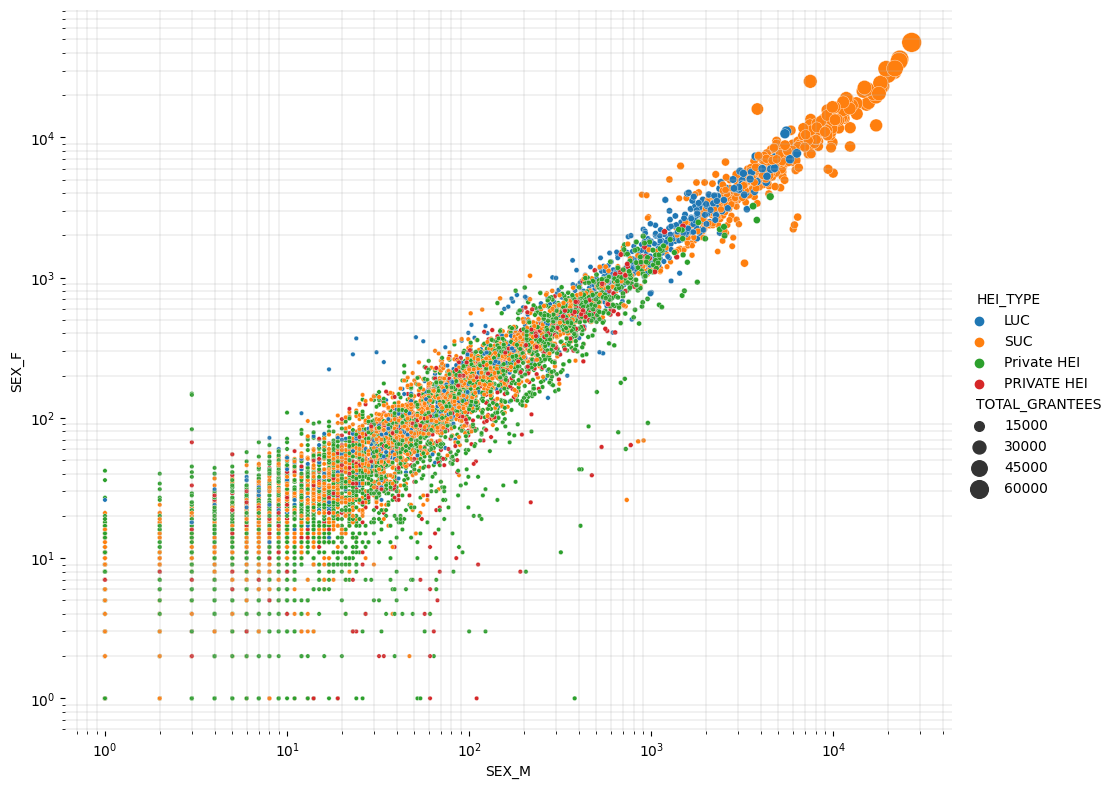

In [108]:
# create relational plot for SEX_M, SEX_F, HEI_TYPE, and TOTAL_GRANTEES
ax = sns.relplot(data=df_fhe_tes, x="SEX_M", y="SEX_F", hue="HEI_TYPE",
                 size='TOTAL_GRANTEES', sizes=(10,200), height = 8,
                 aspect = 1.25)
ax.set(xscale="log", yscale="log")
ax.ax.xaxis.grid(True, "minor", linewidth=.25)
ax.ax.yaxis.grid(True, "minor", linewidth=.25)
ax.despine(left=True, bottom=True)

C:\Users\user\anaconda3\envs\bu_workshop_lany\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


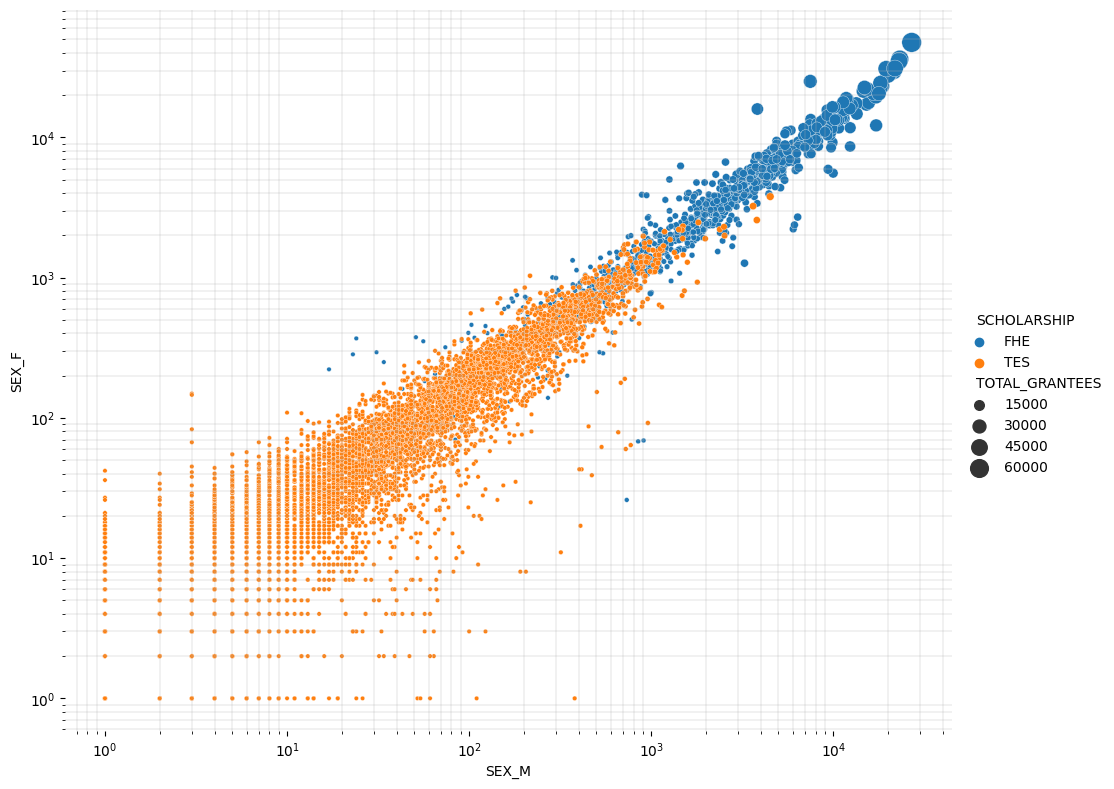

In [110]:
# create relational plot for SEX_M, SEX_F, SCHOLARSHIP, and TOTAL_GRANTEES
ax = sns.relplot(data=df_fhe_tes, x="SEX_M", y="SEX_F", hue="SCHOLARSHIP",
                 size='TOTAL_GRANTEES', sizes=(10,200), height = 8,
                 aspect = 1.25)
ax.set(xscale="log", yscale="log")
ax.ax.xaxis.grid(True, "minor", linewidth=.25)
ax.ax.yaxis.grid(True, "minor", linewidth=.25)
ax.despine(left=True, bottom=True)

#### Line Plots

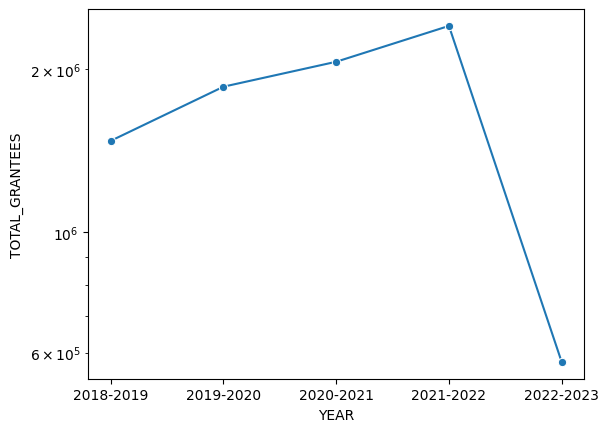

In [128]:
# group data by year
df_year = df_fhe_tes.groupby('YEAR')['TOTAL_GRANTEES'].sum()

# plot line plot
ax = sns.lineplot(data=df_year, marker='o', dashes=False)
ax.set(yscale="log");

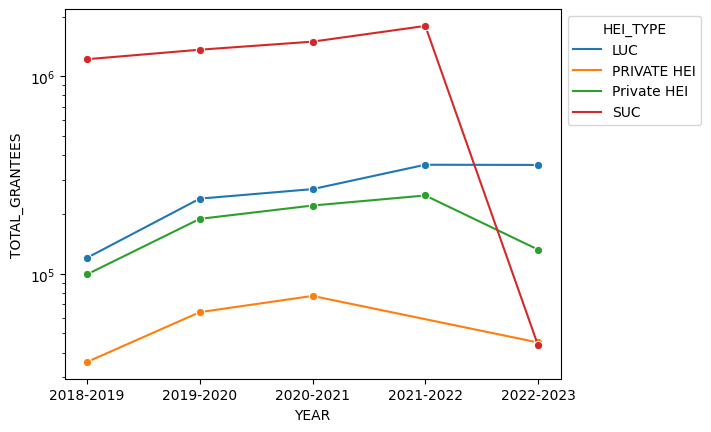

In [138]:
# group data by HEI_TYPE then by YEAR
df_heitype_year = df_fhe_tes.groupby(['HEI_TYPE', 'YEAR'])['TOTAL_GRANTEES'].sum().to_frame().reset_index()

# plot line plot
ax = sns.lineplot(data=df_heitype_year, x='YEAR', y='TOTAL_GRANTEES', hue='HEI_TYPE', marker='o', dashes=False)
ax.set(yscale="log");
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Activity A (By Group)

Form groups of 4-5 members and choose any 3 figures from this notebook (chosen figures may be the same from other groups). Once you have identified the figures, you are to answer the following:
- What do your chosen figures tell you?
- What insights do you think can be drawn from your chosen figure?

Presentation Instructions:

- Prepare a PowerPoint (PPT) presentation with 4-5 slides based on your findings.
- 2 groups will be called to present their findings.
- Each group is given 5-7 minutes to present their findings.
- Ensure your presentation includes:
    - Slide 1: Introduction (briefly explain the purpose of the dataset)
    - Slide 2: Show first chosen figure and the findings for it
    - Slide 3: Show second chosen figure and the findings for it
    - Slide 4: Show third chosen figure and the findings for it

## Activity B (By Group) - Assignment

Form groups of 4-5 members and try to rerun this notebook for the TES data (`tes_clean_data.csv`). Choose any 3 figures from your exploration (chosen figures may be the same from other groups) and answer the following as well:
- What do your chosen figures tell you?
- What insights do you think can be drawn from your chosen figure?

Presentation Instructions (to be presented in the morning Day 2 of the workshop):

- Prepare a PowerPoint (PPT) presentation with 4-5 slides based on your findings.
- 2 groups will be called to present their findings.
- Each group is given 5-7 minutes to present their findings.
- Ensure your presentation includes:
    - Slide 1: Introduction (briefly explain the purpose of the dataset)
    - Slide 2: Show first chosen figure and the findings for it
    - Slide 3: Show second chosen figure and the findings for it
    - Slide 4: Show third chosen figure and the findings for it
 
For reference, the data is given below:

In [140]:
file_path = 'tes_clean_data.csv'
df_tes = pd.read_csv(file_path)
df_tes.head(5)

,REGION,HEI_NAME,HEI_TYPE,HEI_CITY,HEI_PROVINCE,TES_GRANTEES,SEX_M,SEX_F,EDUC,ARTS,SOC_SCI,BUSINESS,NAT_SCI,INFO,ENG,AGRI,HEALTH,SERVICES,OTHERS,YEAR
0,01 - Ilocos Region,ABE International College of Business and Acco...,Private HEI,URDANETA CITY,PANGASINAN,7,2,5,0,0,0,3,0,3,0,0,0,1,0,2018-2019
1,01 - Ilocos Region,AMA Computer College-Dagupan City,Private HEI,DAGUPAN CITY,PANGASINAN,10,6,4,0,0,0,0,0,9,1,0,0,0,0,2018-2019
2,01 - Ilocos Region,AMA Computer College-La Union,Private HEI,SAN FERNANDO CITY,LA UNION,10,7,3,0,0,0,0,0,10,0,0,0,0,0,2018-2019
3,01 - Ilocos Region,AMA Computer College-Laoag City,Private HEI,LAOAG CITY,ILOCOS NORTE,43,14,29,0,0,0,24,0,14,5,0,0,0,0,2018-2019
4,01 - Ilocos Region,Asbury College,Private HEI,ANDA,PANGASINAN,210,48,162,208,2,0,0,0,0,0,0,0,0,0,2018-2019
